In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
path = '/Users/joshuarkarnad/Desktop/Thinkful/Data/WeaponDataCleanedv2.csv'
df = pd.read_csv(path)
df.shape

(24979, 64)

In [3]:
path2 = '/Users/joshuarkarnad/Desktop/Thinkful/Data/WeaponDataNoFollowingYears.csv'
df_no_outcome = pd.read_csv(path2)
df2015 = df_no_outcome[df_no_outcome['Year'] == 2015]
df2015.shape

(2752, 64)

In [4]:
df2014 = df[df['Year'] == 2014]
df = df[df['Year'] < 2014]
print(df.shape)
df2014.shape

(22277, 64)


(2702, 64)

In [5]:
Y = df.FollowingYearWeapons
categorical_col = ['County','LEA Type','Year',
                   'School Name']
corr_array = []
name_array = []
for c in df.columns:
    if c not in categorical_col:
        corr = np.corrcoef(df[c], Y)
        name_array.append(c)
        corr_array.append(corr[0,1])

In [6]:
sort_order = np.argsort(corr_array)
for num in sort_order[::-1]:
    print(name_array[num], corr_array[num])

FollowingYearWeapons 1.0
Offenders 0.57510758587
Possession of a Knife 0.562422372644
No. of Incidents Involving Local Law Enforcement 0.522260293171
Enrollment 0.521217713413
Weapon Incidents 0.504144086231
Incidents 0.466739733749
Drug and Alcohol OSS 0.441904883738
Possession/Use of a Controlled Substance 0.428592920386
Weapon Expulsion 0.427914902777
Total Arrests 0.417694633779
Fighting 0.393695139187
Weapon OSS 0.378971643937
Assignments to Alternative Education 0.378930572051
Cutting Instrument 0.369121145124
Theft 0.367976155271
Threatening a School Official/Student 0.316757240982
Conduct OSS 0.304220768526
Student Simple 0.300382148252
Vandalism 0.29844792929
Possession, Use, or Sale of Tobacco 0.294649291375
BB/Pellet Gun 0.286955852119
Violence Expulsion 0.278018580879
Tobacco OSS 0.272093863931
Sale/Distribution of a Controlled Substance 0.261478341025
Student Aggravated 0.25960200362
Other Harrassment/Intimidation 0.255948179006
Terroristic Threats 0.246232038743
Staff Agg

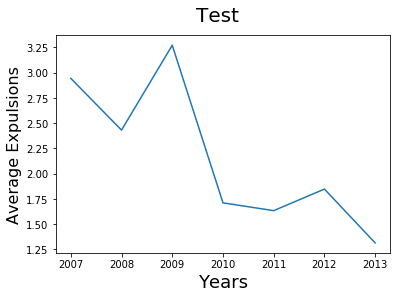

In [8]:
df_years = df.groupby('Year').mean()
fig = plt.figure()
plt.plot(df_years['Weapon Incidents'])
fig.suptitle('Test', fontsize=20)
plt.xlabel('Years', fontsize=18)
plt.ylabel('Average Expulsions', fontsize=16)
plt.show()

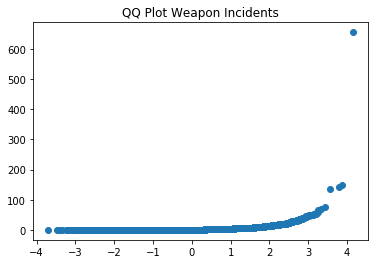

In [9]:
norm = np.random.normal(0, 1, len(df))
norm.sort()
weap_incidents_sorted = df['Weapon Incidents'].sort_values()
plt.plot(norm, df['Weapon Incidents'].sort_values(), "o")
plt.title('QQ Plot Weapon Incidents')
plt.show()

In [11]:
df['County'].describe()

count         22277
unique           67
top       Allegheny
freq           2036
Name: County, dtype: object

In [12]:
df['School Name'].describe()

count              22277
unique              5490
top       Central El Sch
freq                  34
Name: School Name, dtype: object

In [13]:
df['FollowingYearWeapons'].describe()

count    22277.000000
mean         1.942946
std          3.847635
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         76.000000
Name: FollowingYearWeapons, dtype: float64